In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [134]:
!ls


__notebook_source__.ipynb  sub	submission1.csv


In [114]:
import pandas as pd
data=pd.read_csv("../input/train.csv")
print(data.head(1))
print(data.columns)

   id    ...      revenue
0   1    ...     12314651

[1 rows x 23 columns]
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


In [115]:
data_train=data[['budget','original_language','popularity','runtime','release_date','revenue']]
#rev=data['revenue']

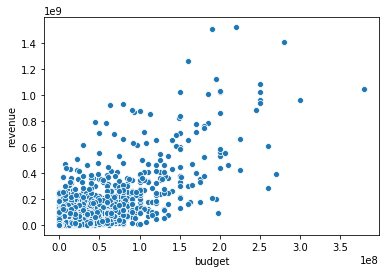

In [116]:
import seaborn as sns
sns.scatterplot(x=data['budget'],y=data['revenue'])


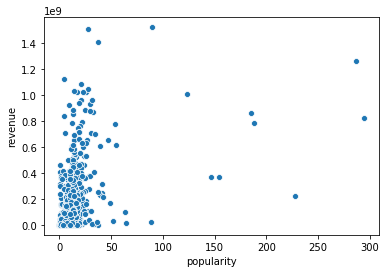

In [117]:
sns.scatterplot(x=data['popularity'],y=data['revenue'])

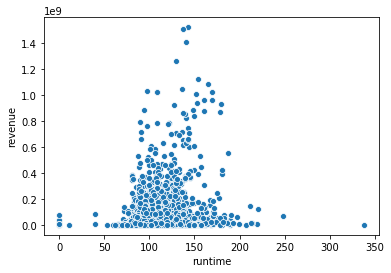

In [118]:
sns.scatterplot(x=data['runtime'],y=data['revenue'])

In [119]:
data_train.dropna(inplace=True)
data_train.isnull().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


budget               0
original_language    0
popularity           0
runtime              0
release_date         0
revenue              0
dtype: int64

In [120]:
import datetime
datetime.datetime.strptime('4/16/03', '%m/%d/%y').strftime('%A')
list_day=[]
for x in range(len(data_train)):
    list_day.append(datetime.datetime.strptime(data_train['release_date'].iloc[x], '%m/%d/%y').strftime('%A'))

In [121]:
data_train['enco_day']=list_day

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
from sklearn.preprocessing import LabelEncoder
days=LabelEncoder()
lang=LabelEncoder()
data_train['days_week']=days.fit_transform(data_train['enco_day'])
data_train['lang_enco']=lang.fit_transform(data_train['original_language'])
print(data_train.columns)

Index(['budget', 'original_language', 'popularity', 'runtime', 'release_date',
       'revenue', 'enco_day', 'days_week', 'lang_enco'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [124]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model.fit(data_train[['budget', 'popularity', 'runtime', 'days_week']],data_train['revenue'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
import numpy as np
data1=pd.read_csv('../input/test.csv')
from sklearn.impute import SimpleImputer
data1['runtime']=data1['runtime'].fillna('100')
data1['runtime'].isnull().sum()
data1['release_date']=data1['release_date'].fillna('10/10/14')
data1['release_date'].isnull().sum()

0

In [126]:
data_tes=data1
print(len(data1))

4398


In [127]:
list_day=[]
data_tes1=data_tes[['budget', 'popularity', 'runtime', 'release_date']]
print(len(data_tes1))
for x in range(len(data_tes1)):
    list_day.append(datetime.datetime.strptime(data_tes1['release_date'].iloc[x], '%m/%d/%y').strftime('%A'))
print(x)
print(len(list_day))
data_tes1['enco_day']=list_day
data_tes1['days_week']=days.transform(data_tes1['enco_day'])
#data_train['lang_enco']=lang.transform(data_train['original_language'])
print(data_tes.columns)


4398
4397
4398
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
predictions=lin_model.predict(data_tes1[['budget', 'popularity', 'runtime', 'days_week']])

In [129]:
print(len(predictions))
print(len(pd.read_csv('../input/test.csv')))

4398
4398


In [130]:
data_sub=pd.read_csv('../input/test.csv')
list_sub=[]
for x in range(len(data_sub)):
    list_sub.append([data_sub.iloc[x]['id'],predictions[x]])
print(len(list_sub))

4398


In [131]:
subm=pd.DataFrame(list_sub,columns=['id','revenue'])

In [135]:
subm.to_csv('submission1.csv',index=False)